### Тема “Обучение без учителя”
#### Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston


In [2]:
boston = load_boston()

boston.keys()


dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [3]:
feature_names = boston["feature_names"]

feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [4]:
data = boston["data"]

data.shape

(506, 13)

Создайте датафреймы X и Y из этих данных.


In [5]:
X = pd.DataFrame(data, columns=feature_names)

X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
target = boston["target"]

target[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

In [7]:
Y = pd.DataFrame(target, columns=["price"])

Y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   506 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.


In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [10]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
477,15.02340,0.0,18.10,0.0,0.6140,5.304,97.3,2.1007,24.0,666.0,20.2,349.48,24.91
15,0.62739,0.0,8.14,0.0,0.5380,5.834,56.5,4.4986,4.0,307.0,21.0,395.62,8.47
332,0.03466,35.0,6.06,0.0,0.4379,6.031,23.3,6.6407,1.0,304.0,16.9,362.25,7.83
423,7.05042,0.0,18.10,0.0,0.6140,6.103,85.1,2.0218,24.0,666.0,20.2,2.52,23.29
19,0.72580,0.0,8.14,0.0,0.5380,5.727,69.5,3.7965,4.0,307.0,21.0,390.95,11.28


Масштабируйте данные с помощью StandardScaler.


In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [13]:
Y_train_scaled = pd.DataFrame(scaler.fit_transform(Y_train), columns=Y_train.columns)
Y_test_scaled = pd.DataFrame(scaler.transform(Y_test), columns=Y_test.columns)

Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.


In [14]:
from sklearn.manifold import TSNE

In [15]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)

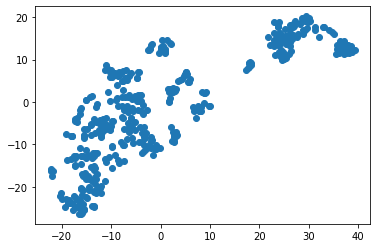

In [16]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()

### Задание 2


С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.


In [17]:
from sklearn.cluster import KMeans

In [18]:
model = KMeans(n_clusters=3, random_state=42, max_iter=100)
labels_train = model.fit_predict(X_train_scaled)

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.


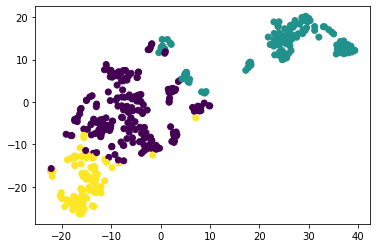

In [19]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.show()

In [20]:
print('Первый кластер: ', Y_train[labels_train == 0].mean())
print('Второй кластер:', Y_train[labels_train == 1].mean())
print('Третий кластер:', Y_train[labels_train == 2].mean())

Первый кластер:  price    24.958115
dtype: float64
Второй кластер: price    16.165354
dtype: float64
Третий кластер: price    27.788372
dtype: float64


In [21]:
print('Первый кластер: ', X_train['CRIM'][labels_train == 0].mean())
print('Второй кластер:', X_train['CRIM'][labels_train == 1].mean())
print('Третий кластер:', X_train['CRIM'][labels_train == 2].mean())

Первый кластер:  0.42166020942408367
Второй кластер: 10.797028425196853
Третий кластер: 0.07356558139534886


### *Задание 3


Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.


In [22]:
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [23]:
X_test_tsne = tsne.fit_transform(X_test_scaled)

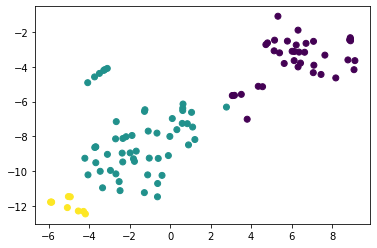

In [24]:
labels_test = model.fit_predict(X_test_scaled)

plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=labels_test)
plt.show()

In [25]:
print('Первый кластер: ', X_test['CRIM'][labels_test == 0].mean())
print('Второй кластер:', X_test['CRIM'][labels_test== 1].mean())
print('Третий кластер:', X_test['CRIM'][labels_test== 2].mean())

Первый кластер:  9.419181842105264
Второй кластер: 0.21929690909090907
Третий кластер: 0.04070333333333334
